<a href="https://colab.research.google.com/github/GuntherFrager/fuzzy-carnival/blob/main/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Inicio

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import itertools
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix

In [ ]:
df_completo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Notebookfinal/usdt-btc2.csv', index_col='Time')

In [ ]:
df.head()

,Open,High,Low,Close,Volume
Time,,,,,
2017-08-18 00:00:00,4244.77,4267.59,4244.77,4244.77,0.657267
2017-08-18 00:01:00,4267.59,4278.05,4267.59,4278.05,0.643297
2017-08-18 00:02:00,4244.77,4244.77,4244.77,4244.77,0.216000
2017-08-18 00:03:00,4278.05,4278.05,4278.05,4278.05,0.456560
2017-08-18 00:04:00,4278.05,4278.05,4278.05,4278.05,0.055644


In [ ]:
df[:1440].describe()

,Open,High,Low,Close,Volume
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,4215.451375,4218.256854,4213.974792,4216.858924,0.747635
std,104.165440,103.839755,104.408027,104.167140,1.152575
min,3949.360000,3956.300000,3938.770000,3938.770000,0.000000
25%,4135.470000,4136.430000,4135.470000,4135.470000,0.035113
50%,4251.735000,4254.280000,4249.510000,4252.630000,0.300000
75%,4296.732500,4300.000000,4294.842500,4298.000000,0.863444
max,4371.420000,4371.520000,4371.400000,4371.520000,8.619423


### Experimentando con candlesticks

In [ ]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.0 MB/s eta 0:00:00


In [ ]:
df2 = df[160:185]
df2.head()

,Open,High,Low,Close,Volume
Time,,,,,
2017-08-18 02:40:00,4291.47,4291.47,4291.47,4291.47,0.432000
2017-08-18 02:41:00,4291.47,4295.40,4291.47,4295.40,0.706374
2017-08-18 02:42:00,4291.47,4295.40,4291.47,4295.40,1.833000
2017-08-18 02:43:00,4340.62,4340.62,4291.17,4291.17,0.795313
2017-08-18 02:44:00,4340.00,4340.00,4290.55,4340.00,3.448118


<ipython-input-35-312e55990266>:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df2.Time = pd.to_datetime(df2.index)
<ipython-input-35-312e55990266>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Color'] = 'g'  # Inicialmente, establecemos todas las velas en verde


KeyError: "['Time'] not in index"

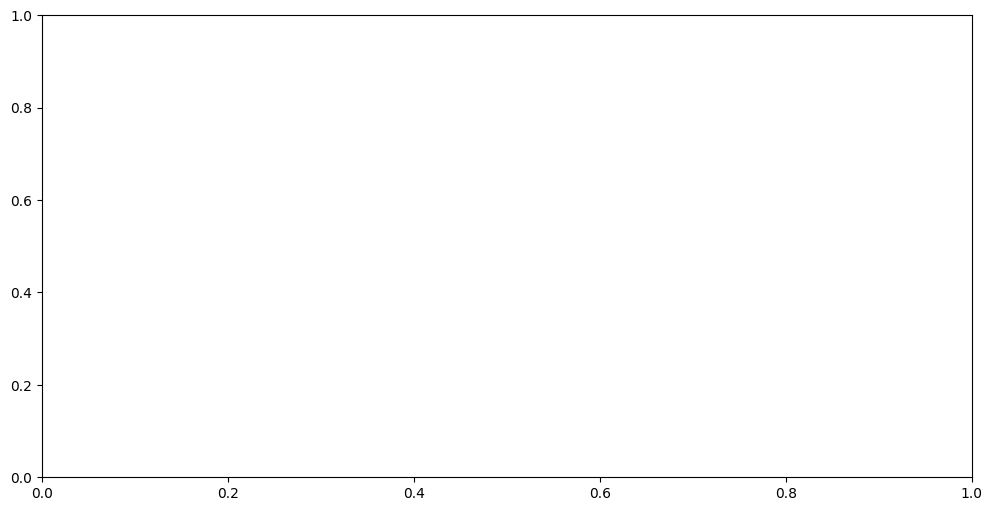

In [ ]:
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd

# Supongamos que tienes un DataFrame de pandas llamado df que contiene tus datos

# Convertir el índice a un formato de fecha
df2['Time'] = pd.to_datetime(df2.index)

# Crear la figura y los ejes del gráfico
fig, ax = plt.subplots(figsize=(12, 6))  # Ajusta el tamaño de la figura según tus preferencias

# Crear una nueva columna 'Color' que determine el color de la vela (verde para subida, rojo para bajada)
df2['Color'] = 'g'  # Inicialmente, establecemos todas las velas en verde
df2.loc[df2['Close'] < df2['Open'], 'Color'] = 'r'  # Cambiamos el color a rojo para las velas bajistas

# Dibujar el gráfico de velas con colores personalizados
candlestick_ohlc(ax, df2[['Time','Open', 'High', 'Low', 'Close']].values, width=0.0005, colorup='g', colordown='r', alpha=0.75)

# Ajustar el formato de las fechas en el eje x para que se muestren correctamente
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))  # Configura el intervalo de 30 minutos
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Formato de las horas:minutos

# Rotar las fechas para que sean legibles
plt.xticks(rotation=45)

# Etiquetas y título del gráfico
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Candlestick Chart')

# Añadir cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
df[160:250]

,Open,High,Low,Close,Volume
Time,,,,,
2017-08-18 02:40:00,4291.47,4291.47,4291.47,4291.47,0.432000
2017-08-18 02:41:00,4291.47,4295.40,4291.47,4295.40,0.706374
2017-08-18 02:42:00,4291.47,4295.40,4291.47,4295.40,1.833000
2017-08-18 02:43:00,4340.62,4340.62,4291.17,4291.17,0.795313
2017-08-18 02:44:00,4340.00,4340.00,4290.55,4340.00,3.448118
...,...,...,...,...,...
2017-08-18 04:05:00,4290.75,4290.75,4290.75,4290.75,0.050936
2017-08-18 04:06:00,4290.75,4290.75,4290.75,4290.75,0.000000
2017-08-18 04:07:00,4290.75,4290.75,4290.75,4290.75,0.389475


### Vuelvo a la normalidad

In [ ]:
df[1440:2880].describe()

,Open,High,Low,Close
count,1440.000000,1440.000000,1440.000000,1440.000000
mean,4062.759597,4064.447153,4062.262396,4063.774993
std,54.944692,53.465466,55.325712,54.251404
min,3870.620000,3882.590000,3850.000000,3850.000000
25%,4023.880000,4027.370000,4023.872500,4027.370000
50%,4068.230000,4069.660000,4068.200000,4068.285000
75%,4096.330000,4096.330000,4096.330000,4096.330000
max,4180.000000,4180.000000,4180.000000,4180.000000


In [ ]:
df_final = pd.DataFrame()

In [ ]:
def normalizar(dataframe, dia):
  i = dia * 1440
  df_final_dia1 = df[:][i:i+1440]
  df_final_dia2 = df[:][i+1440:i+2880]

  nuevo_min = 0.25
  nuevo_max = 0.75


  df_final_dia2['Open'] = ((df_final_dia2['Open'] - df_final_dia1['Open'].min()) / (df_final_dia1['Open'].max() - df_final_dia1['Open'].min())) * (nuevo_max - nuevo_min) + nuevo_min
  df_final_dia2['High'] = ((df_final_dia2['High'] - df_final_dia1['High'].min()) / (df_final_dia1['High'].max() - df_final_dia1['High'].min())) * (nuevo_max - nuevo_min) + nuevo_min
  df_final_dia2['Low'] = ((df_final_dia2['Low'] - df_final_dia1['Low'].min()) / (df_final_dia1['Low'].max() - df_final_dia1['Low'].min())) * (nuevo_max - nuevo_min) + nuevo_min
  df_final_dia2['Close'] = ((df_final_dia2['Close'] - df_final_dia1['Close'].min()) / (df_final_dia1['Close'].max() - df_final_dia1['Close'].min())) * (nuevo_max - nuevo_min) + nuevo_min


  global df_final
  global df_normal
  df_normal = df_final_dia2
  df_final = df[:][i:i+1440]
  return df_final
  return df_normal






In [ ]:
normalizar(df,0)

,Open,High,Low,Close
Time,,,,
2017-08-18 00:00:00,4244.77,4267.59,4244.77,4244.77
2017-08-18 00:01:00,4267.59,4278.05,4267.59,4278.05
2017-08-18 00:02:00,4244.77,4244.77,4244.77,4244.77
2017-08-18 00:03:00,4278.05,4278.05,4278.05,4278.05
2017-08-18 00:04:00,4278.05,4278.05,4278.05,4278.05
...,...,...,...,...
2017-08-18 23:55:00,4156.39,4156.39,4156.39,4156.39
2017-08-18 23:56:00,4156.39,4156.39,4156.39,4156.39
2017-08-18 23:57:00,4156.39,4156.39,4156.39,4156.39


In [ ]:
df_final.describe()

,Open,High,Low,Close
count,1440.000000,1440.000000,1440.000000,1440.000000
mean,4215.451375,4218.256854,4213.974792,4216.858924
std,104.165440,103.839755,104.408027,104.167140
min,3949.360000,3956.300000,3938.770000,3938.770000
25%,4135.470000,4136.430000,4135.470000,4135.470000
50%,4251.735000,4254.280000,4249.510000,4252.630000
75%,4296.732500,4300.000000,4294.842500,4298.000000
max,4371.420000,4371.520000,4371.400000,4371.520000


In [ ]:
df_normal.describe()

,Open,High,Low,Close
count,1440.000000,1440.000000,1440.000000,1440.000000
mean,0.384341,0.380229,0.392723,0.394431
std,0.065091,0.064382,0.063941,0.062682
min,0.156719,0.161240,0.147407,0.147435
25%,0.338281,0.335581,0.348355,0.352369
50%,0.390821,0.386506,0.399585,0.399642
75%,0.424110,0.418621,0.432096,0.432045
max,0.523231,0.519375,0.528795,0.528718


### Training data

In [ ]:
def accionar(df_normal):

  lista = []

  for i in range(len(df_normal.Open)):

    if df_normal.Open[i] / df_normal[:][i+1:i+8].describe().Open['max'] >= 1.002:
      lista.append('V')
    elif df_normal.Open[i] / df_normal[:][i+1:i+8].describe().Open['min'] <= 0.998:
      lista.append('C')
    else:
      lista.append('P')


  df_final['Accion'] = lista
  df_normal['Accion'] = lista

In [ ]:
dfaux1 = df_normal.copy(deep = True)

In [ ]:
dfaux1.head()

,Open,High,Low,Close
Time,,,,
2017-08-19 00:00:00,0.495261,0.490945,0.501508,0.501438
2017-08-19 00:01:00,0.495261,0.490945,0.501508,0.501438
2017-08-19 00:02:00,0.495261,0.490945,0.501508,0.501438
2017-08-19 00:03:00,0.495261,0.490945,0.501508,0.501438
2017-08-19 00:04:00,0.495261,0.490945,0.501508,0.501438


In [ ]:
accionar(dfaux1)

In [ ]:
dfaux1.head()

In [ ]:
df_final.head()

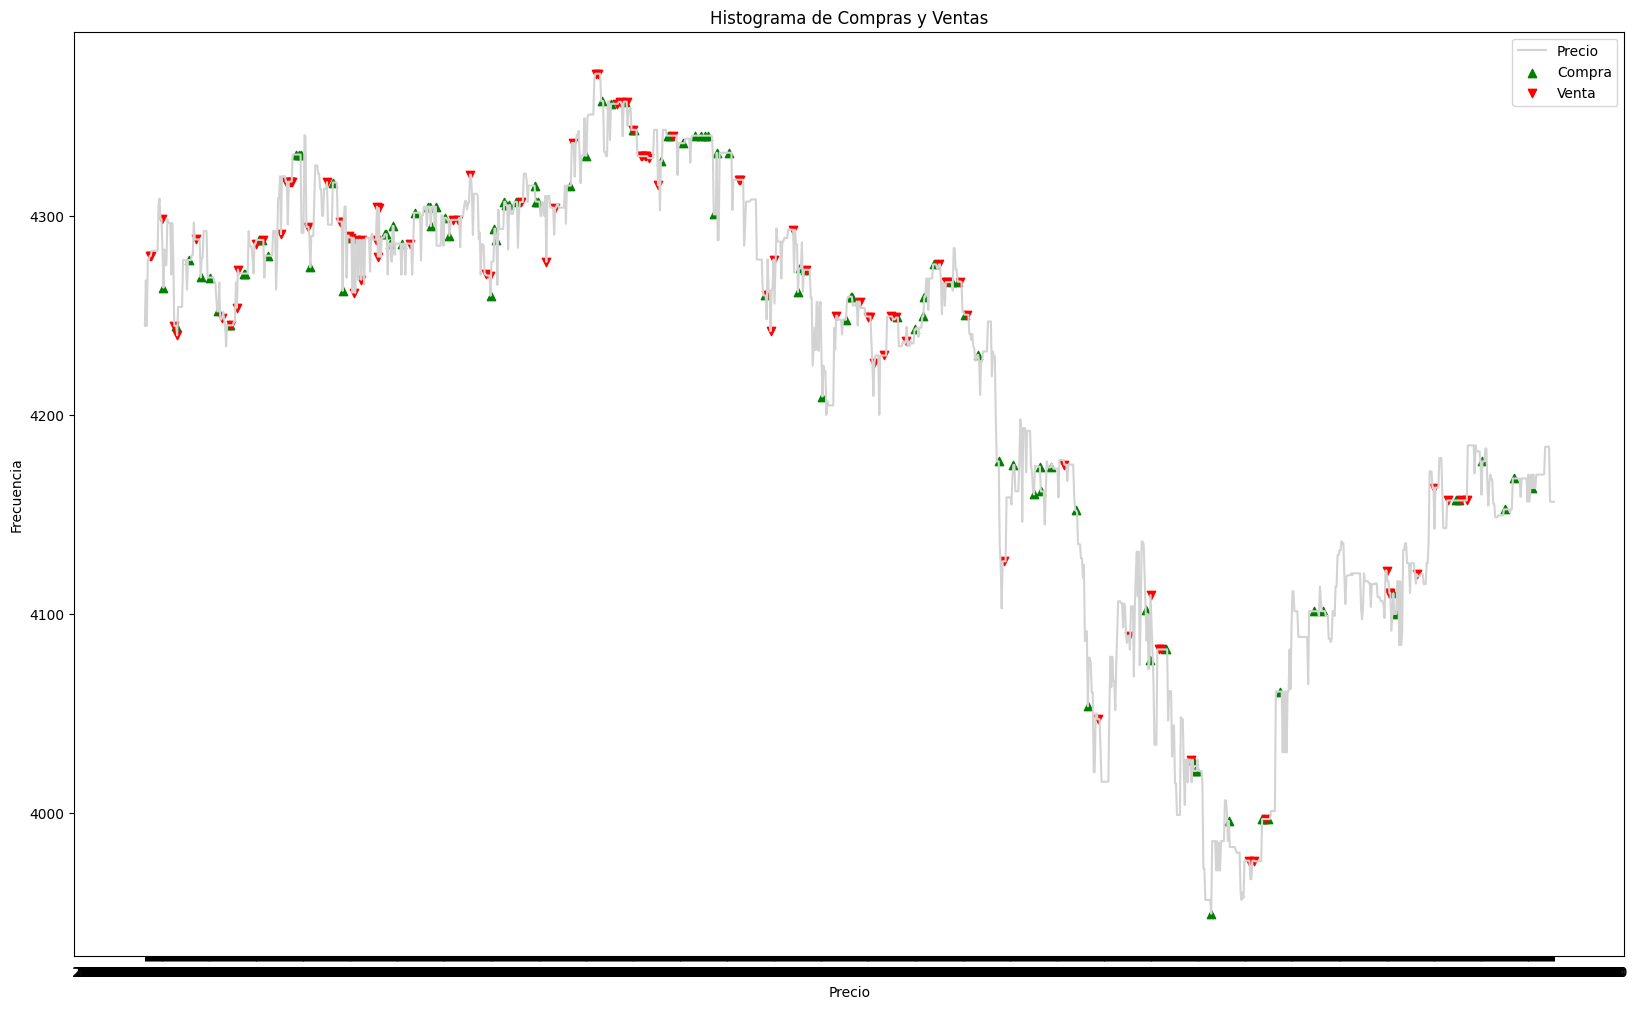

In [ ]:
# Filtrar las compras y ventas
compras = df_final[df_final['Accion'] == 'C']
ventas  = df_final[df_final['Accion'] == 'V']

plt.figure(figsize=(20, 12))

plt.plot(df_final['Open'], color='lightgray', label='Precio')
plt.scatter(compras.index, compras['Open'], color='green', marker='^', label='Compra')
plt.scatter(ventas.index, ventas['Open'], color='red', marker='v', label='Venta')

# Configuración adicional
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Compras y Ventas')
plt.legend()

# Mostrar el histograma
plt.show()


In [ ]:
def simulacion(df):
  BTC = 0.01
  USDT = 100
  total = USDT + (BTC * df['Open'][-1])
  print('Comienza simulacion con', total, 'USD')

  for i in range(len(df['Accion'])):
    if USDT > 5:
      if df['Accion'][i] == 'C':
        monto = USDT * 0.02
        USDT = USDT - monto
        BTC = BTC + (monto / df['Open'][i])

      elif BTC > 0.01:
        if df['Accion'][i] == 'V':
          monto = BTC * 0.02
          BTC = BTC - monto
          USDT = USDT + (monto * df['Open'][i])
      else:
        pass

    elif BTC > 0.01:
      if df['Accion'][i] == 'V':
        monto = BTC * 0.02
        BTC = BTC - monto
        USDT = USDT + (monto * df['Open'][i])
    else:
        pass


  totalaux = total
  total = USDT + (BTC * df['Open'][-1])
  print('Finaliza simulacion con', total, 'USD')
  global ganancia
  ganancia = float(total - totalaux)
  return total


In [ ]:
gananciaacumulada = 0
dias_buenos = []
for i in range(10):
  normalizar(df, i)
  accionar(df_normal)
  simulacion(df_final)
  gananciaacumulada = gananciaacumulada + ganancia
  print('ganancia acumulada:', gananciaacumulada)
  if ganancia > 0:
    dias_buenos.append(i)

Comienza simulacion con 141.5639 USD
Finaliza simulacion con 140.81767789961006 USD
ganancia acumulada: -0.7462221003899288
Comienza simulacion con 141.24689999999998 USD
Finaliza simulacion con 142.13631953192737 USD
ganancia acumulada: 0.1431974315374589
Comienza simulacion con 140.7994 USD
Finaliza simulacion con 140.57396489857464 USD
ganancia acumulada: -0.08223766988788839
Comienza simulacion con 138.2249 USD
Finaliza simulacion con 136.8627391974718 USD
ganancia acumulada: -1.4443984724160828
Comienza simulacion con 140.8372 USD
Finaliza simulacion con 142.5847717969359 USD
ganancia acumulada: 0.3031733245198325
Comienza simulacion con 141.3192 USD
Finaliza simulacion con 141.4643567048363 USD
ganancia acumulada: 0.44833002935612853
Comienza simulacion con 143.4678 USD
Finaliza simulacion con 144.3178503886229 USD
ganancia acumulada: 1.2983804179790184
Comienza simulacion con 142.6604 USD
Finaliza simulacion con 142.26896957435872 USD
ganancia acumulada: 0.9069499923377293
Comie

In [ ]:
dias_buenos

[1, 4, 5, 6, 8]

In [ ]:


for i in range(20):
    j = i
    k = 0 - (20 - i)
    df_aux1[str(i*4+1)] = df_normal.Open[j:k]
    df_aux1[str(i*4+2)] = df_normal.High[j:k]
    df_aux1[str(i*4+3)] = df_normal.Low[j:k]
    df_aux1[str(i*4+4)] = df_normal.Close[j:k]
df_aux1["Accion"] = df_normal.Accion

df_aux1 = df_aux1.dropna()
df_aux1.head()

,1,2,3,4,5,6,7,8,9,10,...,72,73,74,75,76,77,78,79,80,Accion
Time,,,,,,,,,,,,,,,,,,,,,
2017-08-28 00:19:00,0.491249,0.491248,0.491249,0.491248,0.491249,0.491248,0.491249,0.491248,0.491249,0.491248,...,0.491248,0.491249,0.491248,0.491249,0.491248,0.491249,0.491248,0.491249,0.491248,P
2017-08-28 00:20:00,0.491249,0.491248,0.491249,0.491248,0.491249,0.491248,0.491249,0.491248,0.491249,0.491248,...,0.491248,0.491249,0.491248,0.491249,0.491248,0.491249,0.491248,0.491249,0.491248,V
2017-08-28 00:21:00,0.486522,0.486521,0.486392,0.486394,0.486522,0.486521,0.486392,0.486394,0.486522,0.486521,...,0.486394,0.486522,0.486521,0.486392,0.486394,0.486522,0.486521,0.486392,0.486394,P
2017-08-28 00:22:00,0.486395,0.486397,0.486395,0.486397,0.486395,0.486397,0.486395,0.486397,0.486395,0.486397,...,0.486397,0.486395,0.486397,0.486395,0.486397,0.486395,0.486397,0.486395,0.486397,P
2017-08-28 00:23:00,0.486398,0.486397,0.486398,0.486397,0.486398,0.486397,0.486398,0.486397,0.486398,0.486397,...,0.486397,0.486398,0.486397,0.486398,0.486397,0.486398,0.486397,0.486398,0.486397,P


In [ ]:
df_aux1.shape

(1401, 81)

In [ ]:
lista = []
for i in range(len(df_aux1['Accion'])):
  if df_aux1.Accion[i] == 'C':
    lista.append(1)
  elif df_aux1.Accion[i] == "V":
    lista.append(0)
  else:
    lista.append(0.5)

print(lista)
df_aux1['Accion'] = lista

[0.5, 0, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 0.5, 1, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5,

In [ ]:
df_aux1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1401 entries, 2017-08-28 00:19:00 to 2017-08-28 23:39:00
Data columns (total 81 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1401 non-null   float64
 1   2       1401 non-null   float64
 2   3       1401 non-null   float64
 3   4       1401 non-null   float64
 4   5       1401 non-null   float64
 5   6       1401 non-null   float64
 6   7       1401 non-null   float64
 7   8       1401 non-null   float64
 8   9       1401 non-null   float64
 9   10      1401 non-null   float64
 10  11      1401 non-null   float64
 11  12      1401 non-null   float64
 12  13      1401 non-null   float64
 13  14      1401 non-null   float64
 14  15      1401 non-null   float64
 15  16      1401 non-null   float64
 16  17      1401 non-null   float64
 17  18      1401 non-null   float64
 18  19      1401 non-null   float64
 19  20      1401 non-null   float64
 20  21      1401 non-null   float64
 21  22      1

### Red

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cargar tus datos, asumiendo que 'df' es tu DataFrame
# Asegúrate de que tu DataFrame tenga una columna llamada 'target' para la variable de salida
# y otras características necesarias.
# Puedes ajustar esto según tu conjunto de datos real.

# Supongamos que tienes un DataFrame 'df' con características y una columna 'target' para la variable de salida.
# Asegúrate de ajustar esto según tus datos reales.

# Ejemplo de cómo cargar datos:
# df = pd.read_csv('tu_archivo.csv')

# Dividir el conjunto de datos en características (X) y variable de salida (y)
X = df_aux1.drop('Accion', axis=1)
y = df_aux1[df_aux1.columns[:-1]]

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir el modelo de red neuronal en TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(80,)),  # Capa de entrada con 80 neuronas
    tf.keras.layers.Dense(60, activation='relu'),   # Capa oculta con 60 neuronas y activación ReLU
    tf.keras.layers.Dense(1)                        # Capa de salida con 1 neurona para problemas de regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo en el conjunto de prueba
loss, mae = model.evaluate(X_test, y_test)

print(f'Loss en el conjunto de prueba: {loss}')
print(f'MAE en el conjunto de prueba: {mae}')


NameError: name 'df_aux1' is not defined

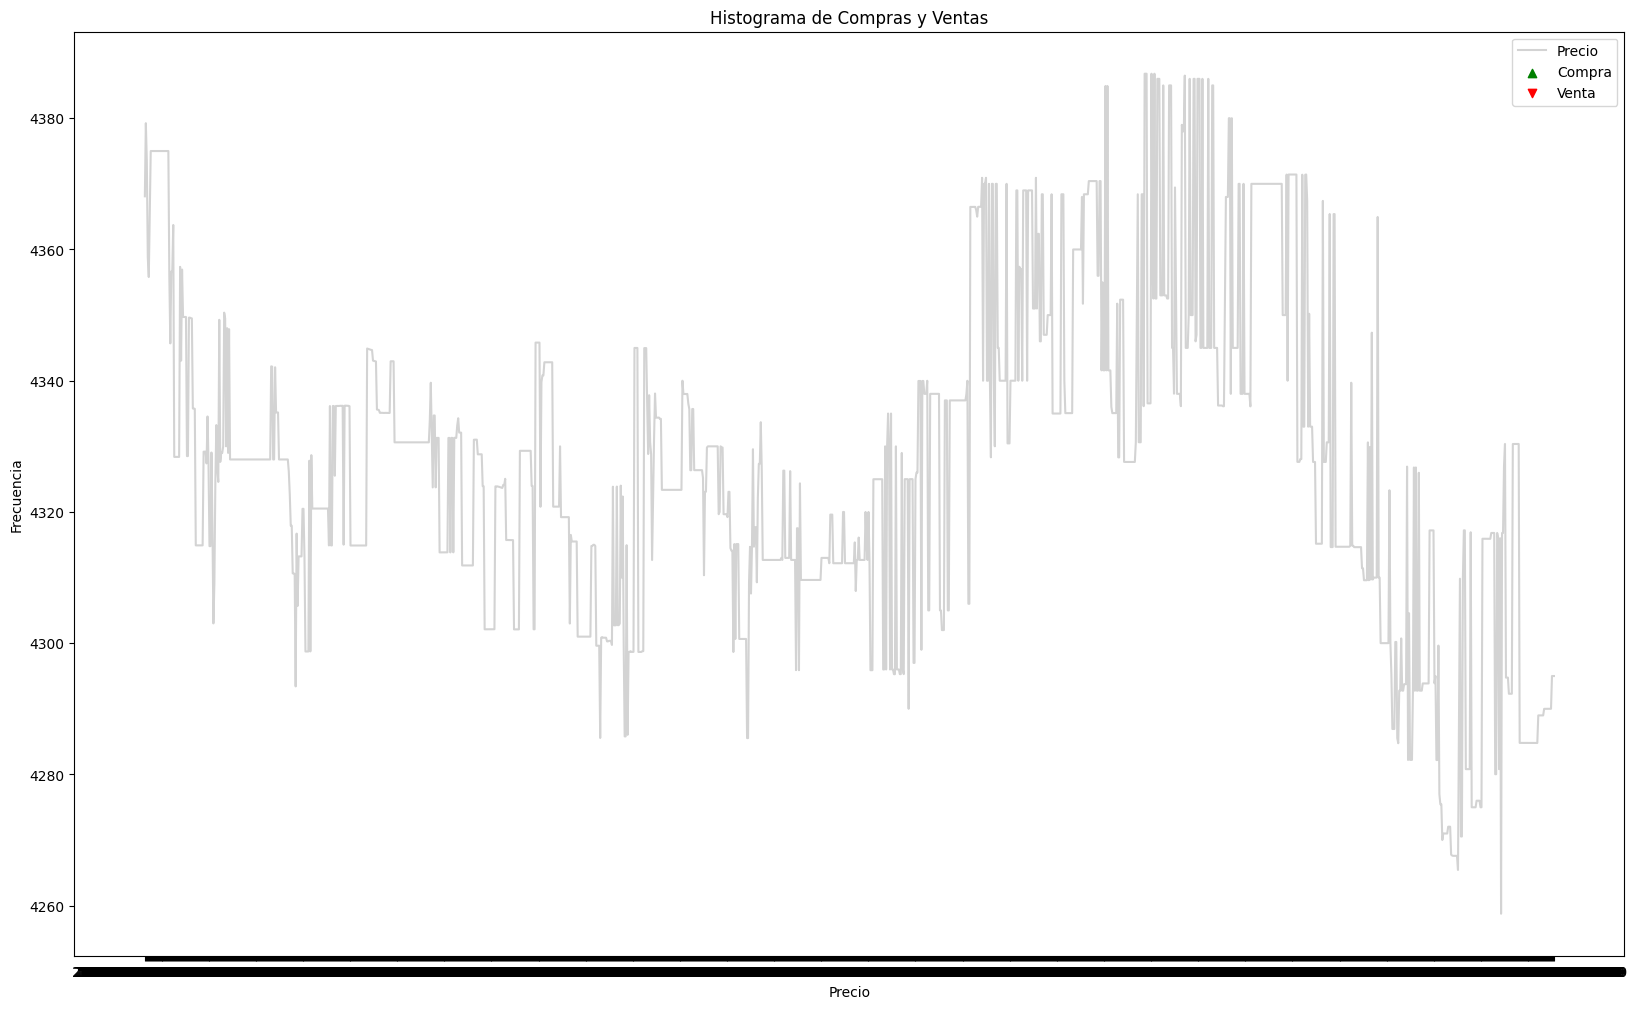

Comienza simulacion con 142.95 USD
Finaliza simulacion con 142.95 USD
142.95


In [ ]:
# Filtrar las compras y ventas
compras = df_final[df_final['Accion'] == 'C']
ventas  = df_final[df_final['Accion'] == 'V']

plt.figure(figsize=(20, 12))

plt.plot(df_final['Open'], color='lightgray', label='Precio')
plt.scatter(compras.index, compras['Open'], color='green', marker='^', label='Compra')
plt.scatter(ventas.index, ventas['Open'], color='red', marker='v', label='Venta')

# Configuración adicional
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Compras y Ventas')
plt.legend()

# Mostrar el histograma
plt.show()

print(simulacion(df_final))

In [ ]:
lista = model.predict(df_aux1.drop('Accion', axis = 1))

44/44 [==============================] - 0s 1ms/step


In [ ]:
lista = [i[0] for i in lista.tolist()]

In [ ]:
pd.DataFrame(lista).describe()

,0
count,1401.000000
mean,0.489939
std,0.005884
min,0.469862
25%,0.486825
50%,0.490776
75%,0.493937
max,0.500109


In [ ]:
lista2 = []
for i in range(18):
  lista2.append(0.5)

In [ ]:
lista.append()

In [ ]:
df_final['Accion'] = lista2+lista+lista2+[0.5,0.5,0.5]

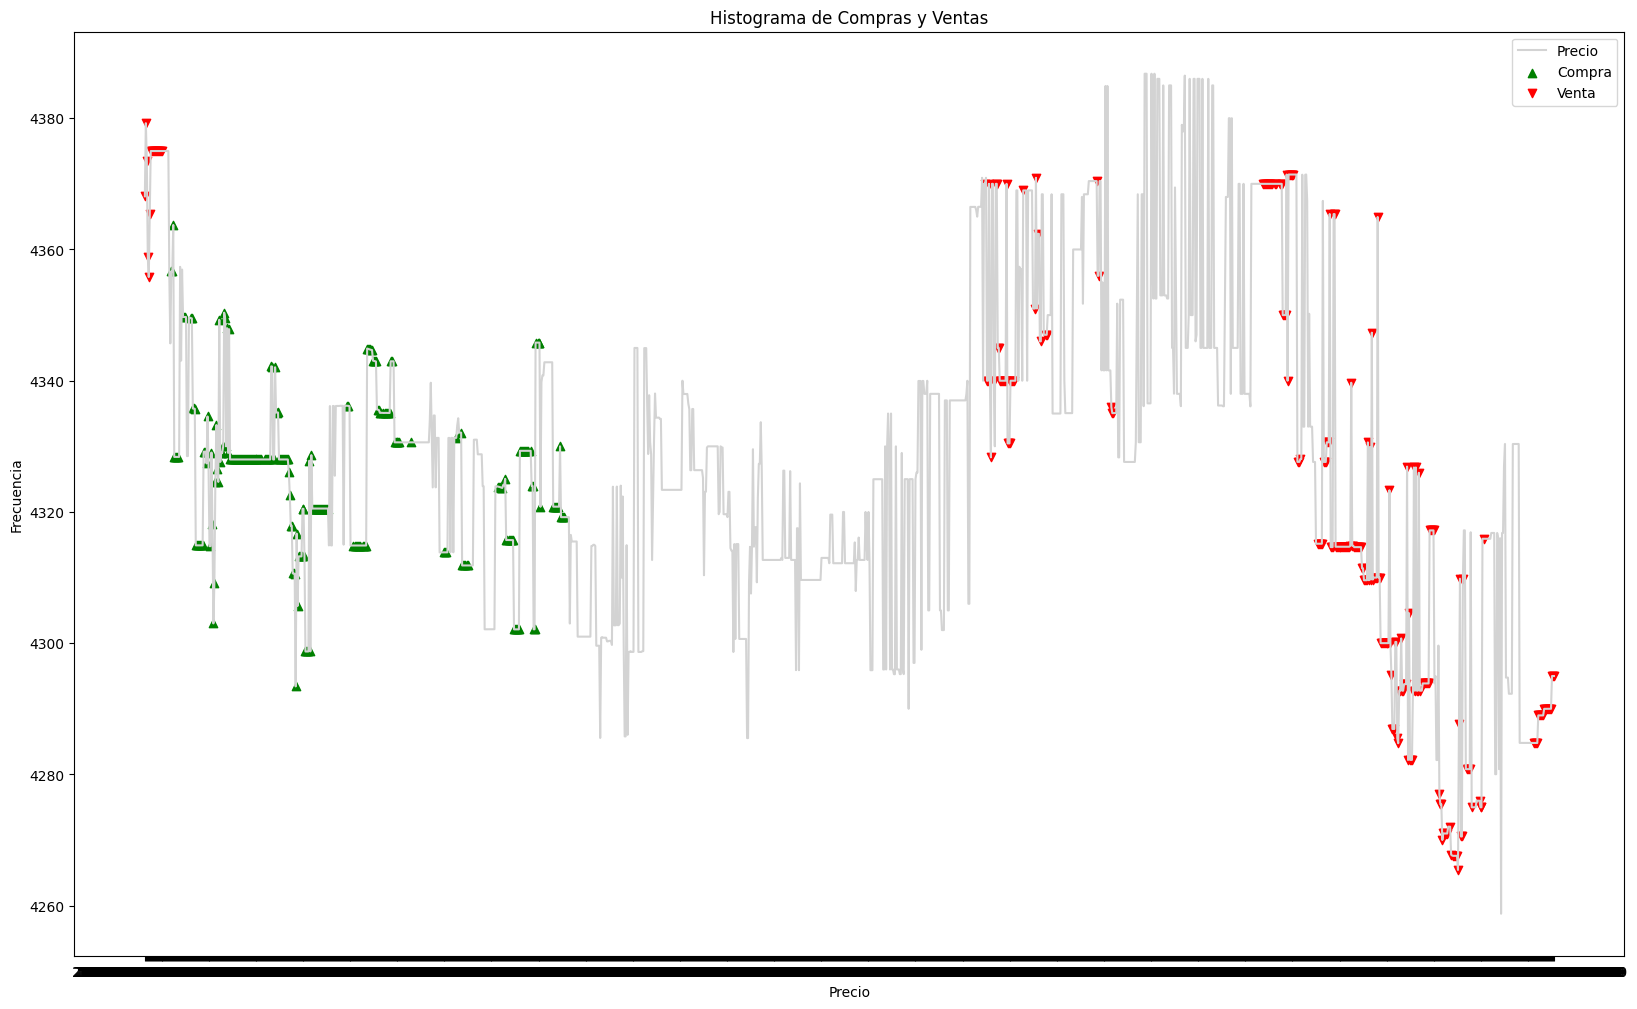

Comienza simulacion con 142.95 USD
Finaliza simulacion con 142.95 USD
142.95


In [ ]:
# Filtrar las compras y ventas
compras = df_final[df_final['Accion'] < 0.484825]
ventas  = df_final[df_final['Accion'] > 0.495937]

plt.figure(figsize=(20, 12))

plt.plot(df_final['Open'], color='lightgray', label='Precio')
plt.scatter(compras.index, compras['Open'], color='green', marker='^', label='Compra')
plt.scatter(ventas.index, ventas['Open'], color='red', marker='v', label='Venta')

# Configuración adicional
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Compras y Ventas')
plt.legend()

# Mostrar el histograma
plt.show()

print(simulacion(df_final))

In [ ]:
df_final.head()

,Open,High,Low,Close,Accion
Time,,,,,
2017-08-27 00:00:00,4368.10,4368.10,4368.10,4368.10,0.5
2017-08-27 00:01:00,4379.24,4379.24,4379.24,4379.24,0.5
2017-08-27 00:02:00,4373.50,4373.50,4372.00,4372.00,0.5
2017-08-27 00:03:00,4358.79,4358.79,4342.58,4342.58,0.5
2017-08-27 00:04:00,4355.80,4375.00,4355.80,4375.00,0.5


### LSTM

In [ ]:
# First we will import the necessary Library

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(5))

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
normalizar(df,1)

NameError: name 'normalizar' is not defined

In [ ]:
df_normal[['Close']][0:10]

,Close
Time,
2017-08-19 00:00:00,0.501438
2017-08-19 00:01:00,0.501438
2017-08-19 00:02:00,0.501438
2017-08-19 00:03:00,0.501438
2017-08-19 00:04:00,0.501438
2017-08-19 00:05:00,0.528718
2017-08-19 00:06:00,0.515072
2017-08-19 00:07:00,0.501438
2017-08-19 00:08:00,0.501438


In [ ]:
training_size = int(len(df_normal.Open)*0.60)
test_size=len(df_normal.Open)-training_size
train_data,test_data=df_normal[['Close']][0:training_size],df_normal[['Close']][training_size:]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (864, 1)
test_data:  (576, 1)


In [ ]:
train_data.head()

,Close
Time,
2017-08-19 00:00:00,0.501438
2017-08-19 00:01:00,0.501438
2017-08-19 00:02:00,0.501438
2017-08-19 00:03:00,0.501438
2017-08-19 00:04:00,0.501438


In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
train_data=scaler.fit_transform(np.array(train_data).reshape(-1,1))
print(train_data.shape)

(864, 1)


In [ ]:
test_data=scaler.fit_transform(np.array(test_data).reshape(-1,1))
print(test_data.shape)

(576, 1)


In [ ]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])

    dataY2 = []
    for i in range(len(dataY)-5):
      dataY2.append(dataY[i:i+5])

    #return np.array(dataX), np.array(dataY)
    return np.array(dataX[:-5]), np.array(dataY2)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (843, 15)
y_train:  (843, 5)
X_test:  (555, 15)
y_test (555, 5)


In [ ]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(5))

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30,batch_size=32,verbose=1)

Epoch 1/200
27/27 [==============================] - 2s 27ms/step - loss: 0.2576 - val_loss: 0.2453
Epoch 2/200
27/27 [==============================] - 0s 12ms/step - loss: 0.1171 - val_loss: 0.0859
Epoch 3/200
27/27 [==============================] - 0s 12ms/step - loss: 0.0287 - val_loss: 0.0195
Epoch 4/200
27/27 [==============================] - 0s 11ms/step - loss: 0.0068 - val_loss: 0.0134
Epoch 5/200
27/27 [==============================] - 0s 12ms/step - loss: 0.0056 - val_loss: 0.0127
Epoch 6/200
27/27 [==============================] - 0s 12ms/step - loss: 0.0054 - val_loss: 0.0122
Epoch 7/200
27/27 [==============================] - 0s 15ms/step - loss: 0.0055 - val_loss: 0.0121
Epoch 8/200
27/27 [==============================] - 0s 12ms/step - loss: 0.0053 - val_loss: 0.0119
Epoch 9/200
27/27 [==============================] - 0s 11ms/step - loss: 0.0053 - val_loss: 0.0118
Epoch 10/200
27/27 [==============================] - 0s 12ms/step - loss: 0.0053 - val_loss: 0.0117

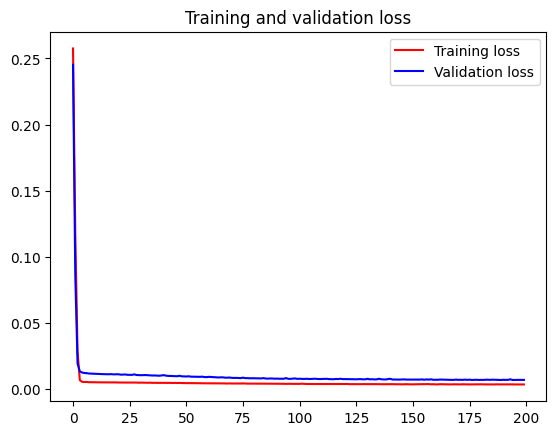

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

18/18 [==============================] - 0s 4ms/step


((843, 5), (555, 5))

In [ ]:
lista = [train_predict[i][4] for i in range(len(train_predict))]
lista2 = []
for i in lista:
  lista2.append(np.array([i]))

train_predict = np.array(lista2)

In [ ]:
lista = [test_predict[i][4] for i in range(len(test_predict))]
lista2 = []
for i in lista:
  lista2.append(np.array([i]))

test_predict = np.array(lista2)

In [ ]:
lista = [y_train[i][4] for i in range(len(y_train))]
lista2 = []
for i in lista:
  lista2.append(np.array([i]))

y_train = np.array(lista2)

In [ ]:
lista = [y_test[i][4] for i in range(len(y_test))]
lista2 = []
for i in lista:
  lista2.append(np.array([i]))

y_test = np.array(lista2)

In [ ]:
train_predict.shape, test_predict.shape

((843, 1), (555, 1))

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  0.012104921391724836
Train data MSE:  0.00014652912189983756
Train data MAE:  0.008582752398558114
-------------------------------------------------------------------------------------
Test data RMSE:  0.017037829655800838
Test data MSE:  0.0002902876393800865
Test data MAE:  0.010859940325736974


In [ ]:


print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))



Train data explained variance regression score: 0.8059813174760692
Test data explained variance regression score: 0.7973598908567816


In [ ]:
closedf = df_normal[['Close']].copy(deep=True)
closedf.head()

,Close
Time,
2017-08-19 00:00:00,0.501438
2017-08-19 00:01:00,0.501438
2017-08-19 00:02:00,0.501438
2017-08-19 00:03:00,0.501438
2017-08-19 00:04:00,0.501438


In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(1440, 1)


In [ ]:
closedf

array([[0.92845455],
       [0.92845455],
       [0.92845455],
       ...,
       [0.83239394],
       [0.83239394],
       [0.83239394]])

In [ ]:
train_predict.shape

(843, 1)

In [ ]:
test_predict.shape

(555, 1)

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-11, :] = test_predict[:]
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': df_normal.index,
                       'original_close': df_normal['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1440, 1)
Test predicted data:  (1440, 1)


# Entrenamiento

A partir de este punto, cada ejecucion de las siguientes celdas entrenara al modelo con la información de un dia, para luego avanzar al dia siguiente.

17/01: Comienzo el entrenamiento con 30 dias, para observar el comportamiento del modelo a mediano plazo

In [ ]:
# First we will import the necessary Library

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow import keras
from tensorflow.keras import layers


# For PLotting we will use these library


from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import PIL
import itertools

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Notebookfinal/usdt-btc2.csv', index_col='Time')

In [ ]:
df.head()

,Open,High,Low,Close,Volume
Time,,,,,
2017-08-18 00:00:00,4244.77,4267.59,4244.77,4244.77,0.657267
2017-08-18 00:01:00,4267.59,4278.05,4267.59,4278.05,0.643297
2017-08-18 00:02:00,4244.77,4244.77,4244.77,4244.77,0.216000
2017-08-18 00:03:00,4278.05,4278.05,4278.05,4278.05,0.456560
2017-08-18 00:04:00,4278.05,4278.05,4278.05,4278.05,0.055644


A continuación defino las dos funciones personalizadas que utilizo

In [ ]:
def normalizar(dataframe, dia):
  i = dia * 1440
  df_final_dia1 = df[:][i:i+1440]
  df_final_dia2 = df[:][i+1440:i+2880]

  nuevo_min = 0.25
  nuevo_max = 0.75


  df_final_dia2['Open'] = ((df_final_dia2['Open'] - df_final_dia1['Open'].min()) / (df_final_dia1['Open'].max() - df_final_dia1['Open'].min())) * (nuevo_max - nuevo_min) + nuevo_min
  df_final_dia2['High'] = ((df_final_dia2['High'] - df_final_dia1['High'].min()) / (df_final_dia1['High'].max() - df_final_dia1['High'].min())) * (nuevo_max - nuevo_min) + nuevo_min
  df_final_dia2['Low'] = ((df_final_dia2['Low'] - df_final_dia1['Low'].min()) / (df_final_dia1['Low'].max() - df_final_dia1['Low'].min())) * (nuevo_max - nuevo_min) + nuevo_min
  df_final_dia2['Close'] = ((df_final_dia2['Close'] - df_final_dia1['Close'].min()) / (df_final_dia1['Close'].max() - df_final_dia1['Close'].min())) * (nuevo_max - nuevo_min) + nuevo_min
  df_final_dia2['Volume'] = ((df_final_dia2['Volume'] - df_final_dia1['Volume'].min()) / (df_final_dia1['Volume'].max() - df_final_dia1['Volume'].min())) * (nuevo_max - nuevo_min) + nuevo_min

  global df_final
  global df_normal
  df_normal = df_final_dia2
  df_final = df[:][i:i+1440]
  return df_final
  return df_normal


def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    dfaux = dataset.copy(deep = True)
    dfaux['0'] = dfaux[0]
    dfaux['0'] = dfaux[1]
    dfaux['0'] = dfaux[2]
    dfaux['0'] = dfaux[3]
    dfaux['0'] = dfaux[4]




    return np.array(dataX[:-5]), np.array(dataY)

In [ ]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(5))

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
normalizar(df,0)

,Open,High,Low,Close,Volume
Time,,,,,
2017-08-18 00:00:00,4244.77,4267.59,4244.77,4244.77,0.657267
2017-08-18 00:01:00,4267.59,4278.05,4267.59,4278.05,0.643297
2017-08-18 00:02:00,4244.77,4244.77,4244.77,4244.77,0.216000
2017-08-18 00:03:00,4278.05,4278.05,4278.05,4278.05,0.456560
2017-08-18 00:04:00,4278.05,4278.05,4278.05,4278.05,0.055644
...,...,...,...,...,...
2017-08-18 23:55:00,4156.39,4156.39,4156.39,4156.39,0.100000
2017-08-18 23:56:00,4156.39,4156.39,4156.39,4156.39,0.000000
2017-08-18 23:57:00,4156.39,4156.39,4156.39,4156.39,0.000000


In [ ]:
df_normal.describe()

,Open,High,Low,Close,Volume
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,0.384341,0.380229,0.392723,0.394431,0.262032
std,0.065091,0.064382,0.063941,0.062682,0.035114
min,0.156719,0.161240,0.147407,0.147435,0.250000
25%,0.338281,0.335581,0.348355,0.352369,0.250000
50%,0.390821,0.386506,0.399585,0.399642,0.250000
75%,0.424110,0.418621,0.432096,0.432045,0.257762
max,0.523231,0.519375,0.528795,0.528718,0.740453


In [ ]:
  training_size = int(len(df_normal.Open)*0.60)
  test_size=len(df_normal.Open)-training_size
  train_data,test_data=df_normal[['Open', 'High', 'Low', 'Close', 'Volume']][0:training_size],df_normal[['Open', 'High', 'Low', 'Close', 'Volume']][training_size:]
  print("train_data: ", train_data.shape)
  print("test_data: ", test_data.shape)

  scaler=MinMaxScaler(feature_range=(0,1))

  train_data=scaler.fit_transform(np.array(train_data).reshape(-1,5))
  print(train_data.shape)

  test_data=scaler.fit_transform(np.array(test_data).reshape(-1,5))
  print(test_data.shape)

  time_step = 5
  X_train, y_train = create_dataset(train_data, time_step)
  X_test, y_test = create_dataset(test_data, time_step)

  print("X_train: ", X_train.shape)
  print("y_train: ", y_train.shape)
  print("X_test: ", X_test.shape)
  print("y_test", y_test.shape)

train_data:  (864, 5)
test_data:  (576, 5)
(864, 5)
(576, 5)
[0.42135885 0.42135885 0.42135885 0.42135885 0.42135885]
[0.83021274 0.83007852 0.83021274 0.83021274 0.83021274]
X_train:  (0,)
y_train:  (0,)
X_test:  (0,)
y_test (0,)


In [ ]:
train_data

array([[0.92368608, 0.92061464, 0.92845455, 0.92845455, 0.        ],
       [0.92368608, 0.92061464, 0.92845455, 0.92845455, 0.        ],
       [0.92368608, 0.92061464, 0.92845455, 0.92845455, 0.        ],
       ...,
       [0.42135885, 0.39807   , 0.45751515, 0.45751515, 0.        ],
       [0.42135885, 0.39807   , 0.45751515, 0.45751515, 0.        ],
       [0.42135885, 0.39807   , 0.45751515, 0.45751515, 0.05842807]])

In [ ]:
df_normal[['Open', 'High', 'Low', 'Close', 'Volume']][0:1]

,Open,High,Low,Close,Volume
Time,,,,,
2017-08-19 00:00:00,0.495261,0.490945,0.501508,0.501438,0.25


In [ ]:
contador_de_vueltas = 0

while contador_de_vueltas <= 365:

  i = contador_de_vueltas

  normalizar(df,i)

#Crear train-test datasets

  training_size = int(len(df_normal.Open)*0.60)
  test_size=len(df_normal.Open)-training_size
  train_data,test_data=df_normal[['Open', 'High', 'Low', 'Close', 'Volume']][0:training_size],df_normal[['Open', 'High', 'Low', 'Close', 'Volume']][training_size:]
  print("train_data: ", train_data.shape)
  print("test_data: ", test_data.shape)

  scaler=MinMaxScaler(feature_range=(0,1))

  train_data=scaler.fit_transform(np.array(train_data).reshape(-1,1))
  print(train_data.shape)

  test_data=scaler.fit_transform(np.array(test_data).reshape(-1,1))
  print(test_data.shape)

  time_step = 5
  X_train, y_train = create_dataset(train_data, time_step)
  X_test, y_test = create_dataset(test_data, time_step)

  print("X_train: ", X_train.shape)
  print("y_train: ", y_train.shape)
  print("X_test: ", X_test.shape)
  print("y_test", y_test.shape)


#Entrenar el modelo

  history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30,batch_size=32,verbose=1)

  contador_de_vueltas = contador_de_vueltas + 1

  print('---------------------------------------------------')
  print('El entrenamiento va en el dia', contador_de_vueltas)


train_data:  (864, 1)
test_data:  (576, 1)
(864, 1)
(576, 1)
X_train:  (843, 15)
y_train:  (843, 5)
X_test:  (555, 15)
y_test (555, 5)
Epoch 1/30
27/27 [==============================] - 1s 48ms/step - loss: 0.0040 - val_loss: 0.0079
Epoch 2/30
27/27 [==============================] - 1s 26ms/step - loss: 0.0039 - val_loss: 0.0077
Epoch 3/30
27/27 [==============================] - 1s 23ms/step - loss: 0.0039 - val_loss: 0.0076
Epoch 4/30
27/27 [==============================] - 1s 20ms/step - loss: 0.0038 - val_loss: 0.0076
Epoch 5/30
27/27 [==============================] - 0s 18ms/step - loss: 0.0039 - val_loss: 0.0076
Epoch 6/30
27/27 [==============================] - 0s 15ms/step - loss: 0.0038 - val_loss: 0.0073
Epoch 7/30
27/27 [==============================] - 0s 16ms/step - loss: 0.0038 - val_loss: 0.0074
Epoch 8/30
27/27 [==============================] - 1s 20ms/step - loss: 0.0038 - val_loss: 0.0080
Epoch 9/30
27/27 [==============================] - 1s 19ms/step - loss: 

<ipython-input-5-5516c138bc37>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-5-5516c138bc37>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-5-5516c138bc37>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



27/27 [==============================] - 0s 15ms/step - loss: 0.0033 - val_loss: 0.0042
Epoch 2/30
27/27 [==============================] - 0s 12ms/step - loss: 0.0033 - val_loss: 0.0043
Epoch 3/30
27/27 [==============================] - 0s 11ms/step - loss: 0.0032 - val_loss: 0.0042
Epoch 4/30
27/27 [==============================] - 0s 12ms/step - loss: 0.0032 - val_loss: 0.0042
Epoch 5/30
27/27 [==============================] - 0s 16ms/step - loss: 0.0032 - val_loss: 0.0043
Epoch 6/30
27/27 [==============================] - 0s 12ms/step - loss: 0.0033 - val_loss: 0.0042
Epoch 7/30
27/27 [==============================] - 0s 12ms/step - loss: 0.0031 - val_loss: 0.0042
Epoch 8/30
27/27 [==============================] - 0s 16ms/step - loss: 0.0032 - val_loss: 0.0042
Epoch 9/30
27/27 [==============================] - 0s 16ms/step - loss: 0.0031 - val_loss: 0.0042
Epoch 10/30
27/27 [==============================] - 0s 12ms/step - loss: 0.0031 - val_loss: 0.0042
Epoch 11/30
27/27 [=

<ipython-input-5-5516c138bc37>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



27/27 [==============================] - 0s 15ms/step - loss: 0.0025 - val_loss: 0.0065
Epoch 2/30
27/27 [==============================] - 0s 14ms/step - loss: 0.0021 - val_loss: 0.0066
Epoch 3/30
27/27 [==============================] - 0s 13ms/step - loss: 0.0021 - val_loss: 0.0065
Epoch 4/30
27/27 [==============================] - 0s 12ms/step - loss: 0.0021 - val_loss: 0.0065
Epoch 5/30
27/27 [==============================] - 0s 11ms/step - loss: 0.0021 - val_loss: 0.0066
Epoch 6/30
27/27 [==============================] - 0s 11ms/step - loss: 0.0021 - val_loss: 0.0066
Epoch 7/30
27/27 [==============================] - 0s 11ms/step - loss: 0.0021 - val_loss: 0.0065
Epoch 8/30
27/27 [==============================] - 0s 11ms/step - loss: 0.0021 - val_loss: 0.0066
Epoch 9/30
27/27 [==============================] - 0s 12ms/step - loss: 0.0021 - val_loss: 0.0066
Epoch 10/30
27/27 [==============================] - 0s 12ms/step - loss: 0.0021 - val_loss: 0.0066
Epoch 11/30
27/27 [=

<ipython-input-5-5516c138bc37>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



27/27 [==============================] - 0s 16ms/step - loss: 0.0010 - val_loss: 0.0028
Epoch 2/30
27/27 [==============================] - 0s 12ms/step - loss: 9.7864e-04 - val_loss: 0.0028
Epoch 3/30
27/27 [==============================] - 0s 12ms/step - loss: 9.6510e-04 - val_loss: 0.0028
Epoch 4/30
27/27 [==============================] - 0s 11ms/step - loss: 9.6512e-04 - val_loss: 0.0028
Epoch 5/30
27/27 [==============================] - 0s 13ms/step - loss: 9.6245e-04 - val_loss: 0.0029
Epoch 6/30
27/27 [==============================] - 0s 13ms/step - loss: 9.5852e-04 - val_loss: 0.0029
Epoch 7/30
27/27 [==============================] - 0s 14ms/step - loss: 9.6141e-04 - val_loss: 0.0029
Epoch 8/30
27/27 [==============================] - 0s 12ms/step - loss: 9.7397e-04 - val_loss: 0.0029
Epoch 9/30
27/27 [==============================] - 0s 15ms/step - loss: 9.5937e-04 - val_loss: 0.0029
Epoch 10/30
27/27 [==============================] - 0s 17ms/step - loss: 9.5675e-04 - v

<ipython-input-5-5516c138bc37>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



27/27 [==============================] - 0s 14ms/step - loss: 0.0028 - val_loss: 0.0019
Epoch 2/30
27/27 [==============================] - 0s 11ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 3/30
27/27 [==============================] - 0s 12ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 4/30
27/27 [==============================] - 0s 12ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 5/30
27/27 [==============================] - 0s 12ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 6/30
27/27 [==============================] - 0s 11ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 7/30
27/27 [==============================] - 0s 12ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 8/30
27/27 [==============================] - 0s 12ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 9/30
27/27 [==============================] - 0s 11ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 10/30
27/27 [==============================] - 0s 11ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 11/30
27/27 [=

<ipython-input-5-5516c138bc37>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



27/27 [==============================] - 0s 14ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 2/30
27/27 [==============================] - 0s 12ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 3/30
27/27 [==============================] - 0s 11ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 4/30
27/27 [==============================] - 0s 11ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 5/30
27/27 [==============================] - 0s 11ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 6/30
27/27 [==============================] - 0s 11ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 7/30
27/27 [==============================] - 0s 11ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 8/30
27/27 [==============================] - 0s 12ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 9/30
27/27 [==============================] - 0s 11ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 10/30
27/27 [==============================] - 0s 11ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 11/30
27/27 [=

<ipython-input-5-5516c138bc37>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-5-5516c138bc37>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Se han truncado las últimas 5000 líneas del flujo de salida.
Epoch 17/30
27/27 [==============================] - 0s 18ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 18/30
27/27 [==============================] - 1s 19ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 19/30
27/27 [==============================] - 1s 20ms/step - loss: 0.0018 - val_loss: 0.0025
Epoch 20/30
27/27 [==============================] - 1s 20ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 21/30
27/27 [==============================] - 1s 21ms/step - loss: 0.0018 - val_loss: 0.0027
Epoch 22/30
27/27 [==============================] - 0s 18ms/step - loss: 0.0018 - val_loss: 0.0025
Epoch 23/30
27/27 [==============================] - 0s 14ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 24/30
27/27 [==============================] - 0s 18ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 25/30
27/27 [==============================] - 0s 16ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 26/30
27/27 [====================

In [ ]:
normalizar(df,250)

#Crear train-test datasets

training_size = int(len(df_normal.Open)*0.60)
test_size=len(df_normal.Open)-training_size
train_data,test_data=df_normal[['Close']][0:training_size],df_normal[['Close']][training_size:]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

scaler=MinMaxScaler(feature_range=(0,1))

train_data=scaler.fit_transform(np.array(train_data).reshape(-1,1))
print(train_data.shape)

test_data=scaler.fit_transform(np.array(test_data).reshape(-1,1))
print(test_data.shape)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

lista = [train_predict[i][4] for i in range(len(train_predict))]
lista2 = []
for i in lista:
  lista2.append(np.array([i]))

train_predict = np.array(lista2)

lista = [test_predict[i][4] for i in range(len(test_predict))]
lista2 = []
for i in lista:
  lista2.append(np.array([i]))

test_predict = np.array(lista2)

lista = [y_train[i][4] for i in range(len(y_train))]
lista2 = []
for i in lista:
  lista2.append(np.array([i]))

y_train = np.array(lista2)

lista = [y_test[i][4] for i in range(len(y_test))]
lista2 = []
for i in lista:
  lista2.append(np.array([i]))

y_test = np.array(lista2)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))

closedf = df_normal[['Close']].copy(deep=True)
closedf.head()

scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-11, :] = test_predict[:]
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': df_normal.index,
                       'original_close': df_normal['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

train_data:  (864, 1)
test_data:  (576, 1)
(864, 1)
(576, 1)
X_train:  (843, 15)
y_train:  (843, 5)
X_test:  (555, 15)
y_test (555, 5)
18/18 [==============================] - 0s 6ms/step
Train data RMSE:  0.03418401105803977
Train data MSE:  0.0011685466120161853
Train data MAE:  0.027310275348236098
-------------------------------------------------------------------------------------
Test data RMSE:  0.040999131167589735
Test data MSE:  0.0016809287564972283
Test data MAE:  0.030897676496372838
Train data explained variance regression score: 0.9604929417265059
Test data explained variance regression score: 0.9560984783786493
(1440, 1)
Train predicted data:  (1440, 1)
Test predicted data:  (1440, 1)


### Prueba piloto

A continuación elaboro pruebas con dias que no han sido utilizados para entrenar el modelo

17/01: El modelo se comporta zarpado

Predice ligeramente tarde los cambios, por lo que hay que tomar en cuenta predicciones relativamente lejanas (10 a 30 minutos) para saber lo que va a pasar en los proximos 2 o 3 minutos

In [ ]:
normalizar(df, 593)

,Open,High,Low,Close
Time,,,,
2019-04-24 00:00:00,5520.43,5522.28,5520.43,5522.28
2019-04-24 00:01:00,5522.26,5523.49,5520.80,5523.00
2019-04-24 00:02:00,5523.28,5523.28,5520.50,5522.25
2019-04-24 00:03:00,5522.27,5523.99,5522.26,5523.07
2019-04-24 00:04:00,5523.92,5529.14,5520.53,5525.10
...,...,...,...,...
2019-04-24 23:55:00,5407.93,5409.04,5405.05,5405.20
2019-04-24 23:56:00,5405.63,5406.57,5400.00,5401.34
2019-04-24 23:57:00,5402.13,5404.31,5400.01,5401.99


In [ ]:
train_data = df_normal[['Close']]

In [ ]:
train_data.head()

,Close
Time,
2019-04-25 00:00:00,0.384798
2019-04-25 00:01:00,0.377410
2019-04-25 00:02:00,0.368570
2019-04-25 00:03:00,0.363644
2019-04-25 00:04:00,0.352530


In [ ]:
train_data=scaler.fit_transform(np.array(train_data).reshape(-1,1))
print(train_data.shape)

(1440, 1)


In [ ]:
train_data

array([[0.77040023],
       [0.76029369],
       [0.7482004 ],
       ...,
       [0.79093003],
       [0.71016412],
       [0.71396487]])

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)

In [ ]:
X_train.shape

(1419, 15)

In [ ]:
def pruebapiloto(df,minuto):
  mi_array = np.array([X_train[minuto]])
  mi_array_comparacion = np.array([X_train[minuto+15][0:5]])
  valorf = model.predict(mi_array)

  return valorf , mi_array_comparacion


In [ ]:
prediccion , comparacion = pruebapiloto(X_train, 764)

1/1 [==============================] - 0s 42ms/step


In [ ]:
print(prediccion)

[[0.84436864 0.83849025 0.83383095 0.8310629  0.82967114]]


In [ ]:
print(comparacion)

[[0.83806507 0.84177944 0.84500432 0.84523467 0.84670314]]


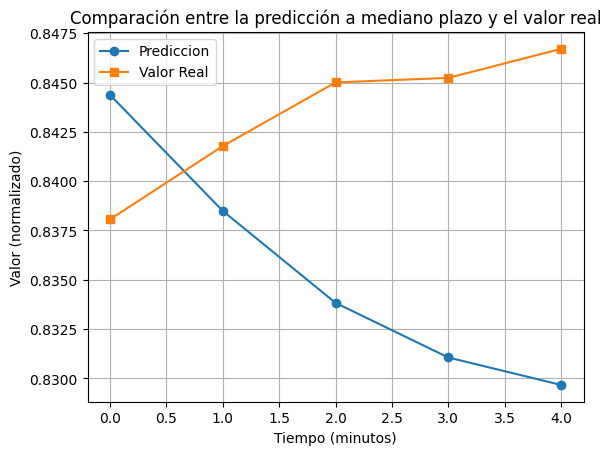

In [ ]:
# Datos de ejemplo (puedes reemplazarlos con tus propios datos)
tiempo = np.arange(0, 5, 1)
activo1 = prediccion[0]
activo2 = comparacion[0]

# Crear el gráfico de líneas
plt.plot(tiempo, activo1, label='Prediccion', marker='o')
plt.plot(tiempo, activo2, label='Valor Real', marker='s')

# Configurar el gráfico
plt.title('Comparación entre la predicción a mediano plazo y el valor real')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Valor (normalizado)')
plt.legend()  # Mostrar leyenda

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [ ]:
largo = df.shape[0]
dias = largo / 1440

print('Hay', dias, 'dias en el dataset')

Hay 2223.0 dias en el dataset


### Experimento: RSI

In [ ]:
int(len(df_completo)/dia)

1986

In [ ]:
dia = 1440
dias = []
for i in range(int((len(df_completo))/dia)):
  dias.append(i * dia)

print(dias)

[0, 1440, 2880, 4320, 5760, 7200, 8640, 10080, 11520, 12960, 14400, 15840, 17280, 18720, 20160, 21600, 23040, 24480, 25920, 27360, 28800, 30240, 31680, 33120, 34560, 36000, 37440, 38880, 40320, 41760, 43200, 44640, 46080, 47520, 48960, 50400, 51840, 53280, 54720, 56160, 57600, 59040, 60480, 61920, 63360, 64800, 66240, 67680, 69120, 70560, 72000, 73440, 74880, 76320, 77760, 79200, 80640, 82080, 83520, 84960, 86400, 87840, 89280, 90720, 92160, 93600, 95040, 96480, 97920, 99360, 100800, 102240, 103680, 105120, 106560, 108000, 109440, 110880, 112320, 113760, 115200, 116640, 118080, 119520, 120960, 122400, 123840, 125280, 126720, 128160, 129600, 131040, 132480, 133920, 135360, 136800, 138240, 139680, 141120, 142560, 144000, 145440, 146880, 148320, 149760, 151200, 152640, 154080, 155520, 156960, 158400, 159840, 161280, 162720, 164160, 165600, 167040, 168480, 169920, 171360, 172800, 174240, 175680, 177120, 178560, 180000, 181440, 182880, 184320, 185760, 187200, 188640, 190080, 191520, 192960,

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Crear un conjunto de datos de ejemplo
dia = 1440

df = df_completo.iloc[dias[:]]

# Calcular el cambio de precio
df['Price Change'] = df['Close'].diff()

# Calcular los retornos positivos y negativos
df['Gain'] = np.where(df['Price Change'] > 0, df['Price Change'], 0)
df['Loss'] = np.where(df['Price Change'] < 0, abs(df['Price Change']), 0)

# Calcular el promedio móvil exponencial de los retornos positivos y negativos
rsi_period = 14
df['Avg Gain'] = df['Gain'].rolling(window=rsi_period).mean()
df['Avg Loss'] = df['Loss'].rolling(window=rsi_period).mean()

# Calcular el RSI
df['RS'] = df['Avg Gain'] / df['Avg Loss']
df['RSI'] = 100 - (100 / (1 + df['RS']))

# Graficar el RSI
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Precio', color='Blue')
plt.scatter(df.index[df['RSI'] >= 70], df['Close'][df['RSI'] >=70], color='red', label='vender')
plt.scatter(df.index[df['RSI'] <= 30], df['Close'][df['RSI'] <=30], color='green', label='comprar')
#plt.axhline(70, linestyle='--', color='red')  # Línea de sobrecompra
#plt.axhline(30, linestyle='--', color='green')  # Línea de sobreventa
plt.title('Índice de Fuerza Relativa (RSI)')
plt.xlabel('Fecha')
plt.ylabel('RSI')
plt.legend()
plt.show()

<ipython-input-41-e1249a6bc62e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Change'] = df['Close'].diff()
<ipython-input-41-e1249a6bc62e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gain'] = np.where(df['Price Change'] > 0, df['Price Change'], 0)
<ipython-input-41-e1249a6bc62e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Price Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI
Time,,,,,,,,,,,,
2023-02-22 08:40:00,24051.91,24058.45,24044.59,24054.61,226.74420,NaN,0.00,0.0,NaN,NaN,NaN,NaN
2023-02-22 08:41:00,24054.61,24085.20,24051.62,24071.26,301.14797,16.65,16.65,0.0,NaN,NaN,NaN,NaN
2023-02-22 08:42:00,24069.75,24099.19,24059.89,24096.74,228.64026,25.48,25.48,0.0,NaN,NaN,NaN,NaN
2023-02-22 08:43:00,24096.74,24118.25,24092.55,24114.95,277.30101,18.21,18.21,0.0,NaN,NaN,NaN,NaN
2023-02-22 08:44:00,24116.15,24131.28,24113.24,24126.59,200.56591,11.64,11.64,0.0,14.396,0.0,inf,100.0
